In [1]:
import pandas as pd
import numpy as np

# Get Data, EDA

In [7]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Basic Exploration
1. 891 rows, 12 columns ie 891 people, 12 variables about each person

2. Columns Looking at the Kaggle Site
    1. Survived" column, 1 = Yes, 0 = No
    2. pclass: ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
    3. sex: male or female
    4. age: in years
    5. sibsp: # of siblings or spouses aboard the Titanic
    6. parch: # of parents or children aboard the Titanic
    7. ticket: ticket number
    8. fare: passenger fare
    9. cabin: cabin number
    10. embarked: port of embarkation, C = Cherbourg, Q = Queenston, S = Southampton
    11. PassengerId
    12. Name


In [16]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


test data has 418 rows but 11 columns because 'Survived' is the class we are trying to predict

In [17]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### The gender submission is an example of what the submission file should look like. The reason why it is called gender is because this result was created by assuming that any female in the TEST set would survive 

In [11]:
import missingno

<AxesSubplot:ylabel='Frequency'>

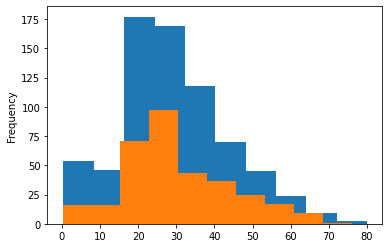

In [19]:
train.Age.plot.hist()
test.Age.plot.hist()

<AxesSubplot:>

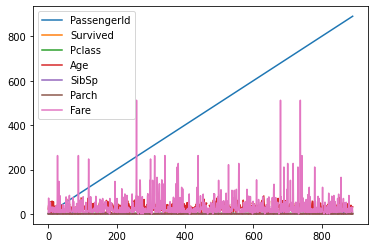

In [23]:
train.plot()

## Looking for missing values

<AxesSubplot:>

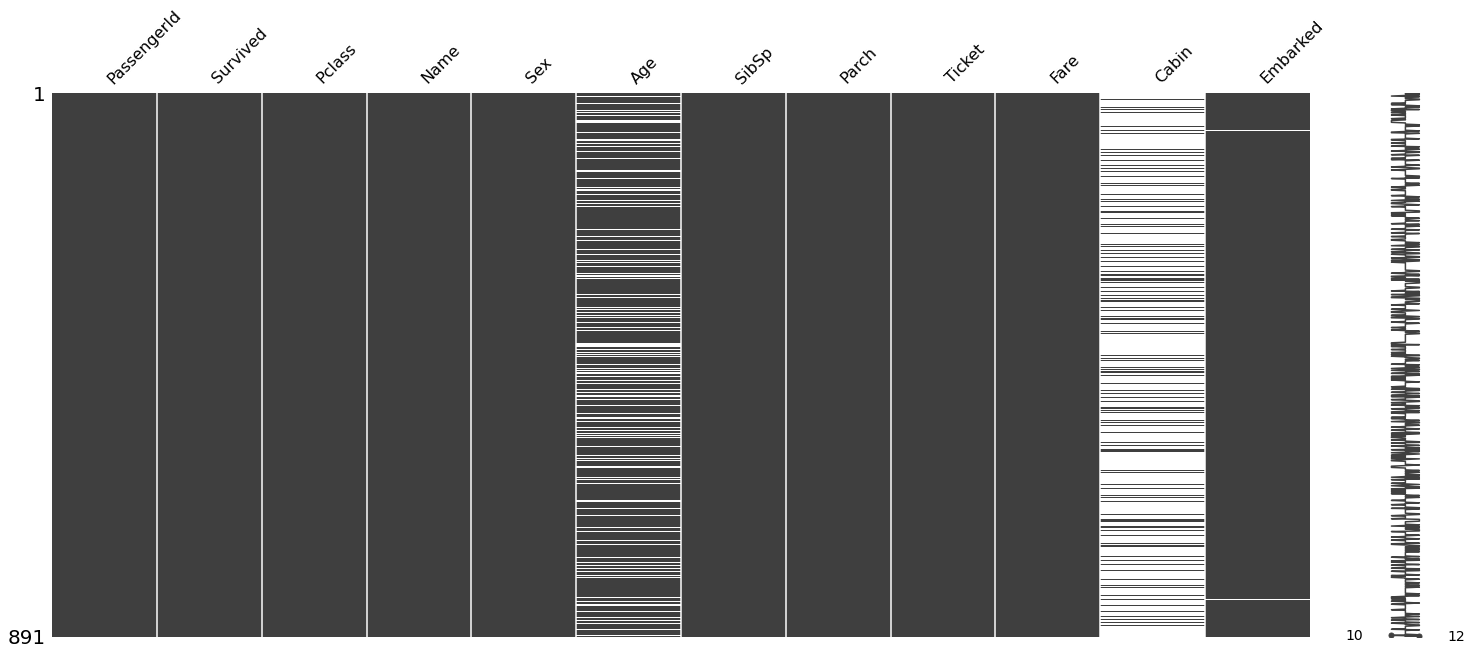

In [28]:
missingno.matrix(train)

In [35]:
# print(train.Age.describe())
print(train.Cabin.describe())


count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


1. We can see that Age and Cabin has a lot of missing data. We can double check using describe to see the count. There are 891 rows but there are only 714 counted. So 177 rows missing

2. Cabin might not even be worth it to check on seeing how there almost no data